<a href="https://colab.research.google.com/github/sakunisgithub/machine_learning/blob/master/0009_kNN_on_Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Imports

In [1]:
import kagglehub

import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

# Data and Initial Sanity Checks

## Loading the Data

In [2]:
path = kagglehub.dataset_download("uciml/glass")

In [3]:
df = pd.read_csv(f"{path}/glass.csv")

## Shape

In [4]:
df.shape

(214, 10)

# Columns

In [5]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Missing Values

In [7]:
df.isna().any().any()

np.False_

## Frequency Distribution of Response Variable

In [8]:
a = df['Type'].value_counts(); print(a)

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


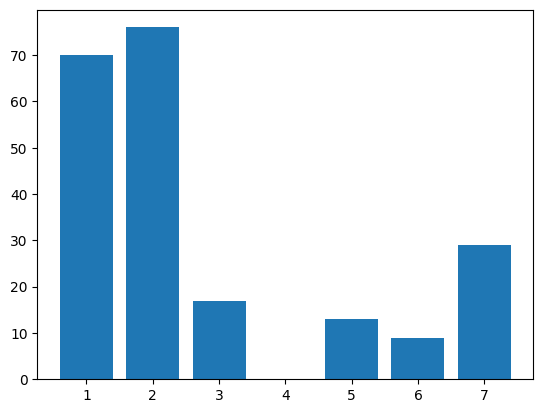

In [9]:
plt.bar(a.index, a.values)
plt.show()

$\textit{Type 1}$ and $\textit{Type 2}$ are present with high frequency, but $\textit{Type 3, 5, 6, 7}$ have much low frequency in comparison to $\textit{1}$ and $\textit{2}$. Also $\textit{Type 4}$ is not even present in the data.

So it will not be wrong to comment that the data is quite imbalanced.

# Train-Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :10], df.iloc[:, 9], test_size = 0.2, random_state = 4)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 10)
(43, 10)
(171,)
(43,)


## Frequency Distribution in the Training Set

In [12]:
b = y_train.value_counts(); print(b)

Type
2    59
1    56
7    22
3    17
5    10
6     7
Name: count, dtype: int64


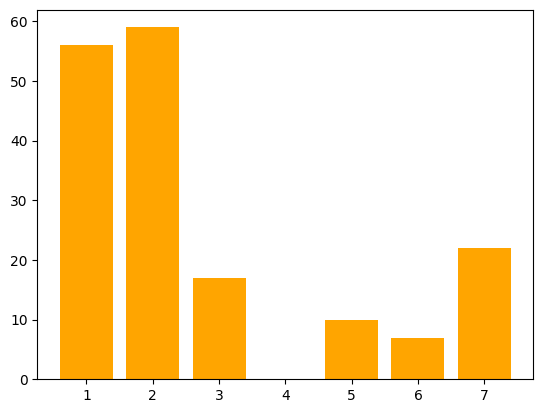

In [13]:
plt.bar(b.index, b.values, color = 'orange')
plt.show()

The original data were quite imbalanced and that imbalance has carried over to the training data.

# Scaling

In [14]:
scale = StandardScaler()

x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [15]:
x_train[:2, :]

array([[ 3.1616487 , -1.00311703, -1.91446052, -1.62124609, -0.83835263,
        -0.6518938 ,  4.04230218, -0.33163481, -0.59162439, -0.36569597],
       [-0.85587095,  1.98287282,  0.67818528,  0.63851926, -1.03550809,
        -0.50968964, -1.17556261, -0.33163481,  0.61875771, -0.36569597]])

# Search for Optimal Value of $k$

In [16]:
accuracies = []

for k in range(1, 21) :

  knn = KNeighborsClassifier(n_neighbors = k)

  knn.fit(x_train, y_train)

  y_pred = knn.predict(x_test)

  accuracies.append(accuracy_score(y_test, y_pred))

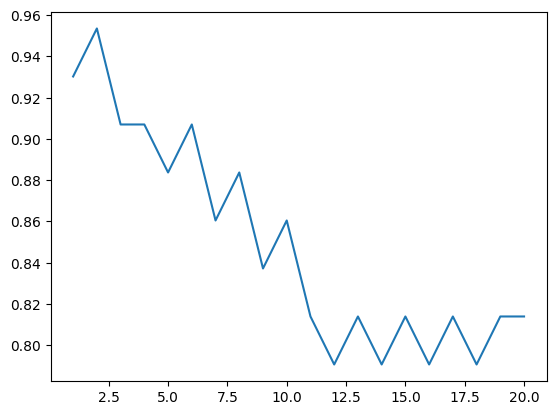

In [17]:
plt.plot(range(1, 21), accuracies)
plt.show()

Optimal choice of $k$ is 2.

# The Best Model

In [18]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9534883720930233
